# Kaplan-Meier Estimator

Run this notebook to reproduce our plot for the Kaplan-Meier estimator

Authors: Mattes Warning, Hamzeh Tesh

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tueplots import bundles
from src.kaplan_meier import KaplanMeier

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("../../dat/preprocessed_brca_metabric_clinical_data.tsv", sep='\t')

# creating binary survival status 
df['Overall Survival'] = df['Overall Survival Status'].map({'0:LIVING': 0, '1:DECEASED': 1})
df['Relapse Free Status'] = df['Relapse Free Status'].map({'0:Not Recurred': 0, '1:Recurred': 1})

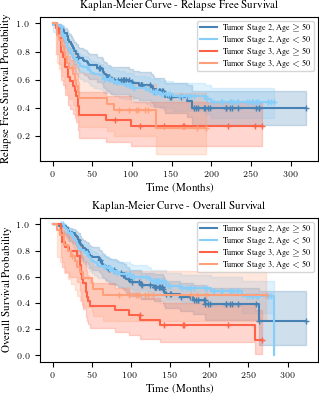

In [3]:
# Update pyplot parameters to fit the icml2022 format
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1))

# Define colors
colors_1 = ['steelblue', 'tomato']
colors_2 = ['lightskyblue', 'lightsalmon']

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# Create plot
for i, tumor_stage in enumerate([2,3]):
        
        # Change axis to upper plot
        plt.sca(ax1)
        # Compute Kaplan-Meier estimator for relapse free status
        km1, km2 = KaplanMeier(df, tumor_stage, 'Relapse Free Status')
        
        # Plot curves
        km1.plot(color=colors_1[i], show_censors=True, censor_styles={'ms': 4})
        km2.plot(color=colors_2[i], show_censors=True, censor_styles={'ms': 4})
        
        
        # Change axis to lower plot
        plt.sca(ax2)
        # Compute Kaplan-Meier estimator for overall survival
        km1, km2 = KaplanMeier(df, tumor_stage, 'Overall Survival')
        
        # Plot curves
        km1.plot(color=colors_1[i], show_censors=True, censor_styles={'ms': 4})
        km2.plot(color=colors_2[i], show_censors=True, censor_styles={'ms': 4})
    

ax1.set_title('Kaplan-Meier Curve - Relapse Free Survival')
ax1.set_xlabel('Time (Months)')
ax1.set_ylabel('Relapse Free Survival Probability')
ax1.legend()

ax2.set_title('Kaplan-Meier Curve - Overall Survival')
ax2.set_xlabel('Time (Months)')
ax2.set_ylabel('Overall Survival Probability')
ax2.legend()

plt.savefig('fig_KaplanMeier.pdf')
plt.show()